<a href="https://colab.research.google.com/github/paniedimo/crossword_Belarusian/blob/main/Slounik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASKS:


1.   Make a termination function
2.   Filter the words
3.   Break the loop



You need to upload the following files:

*   `Original.csv`
*   `Filtered.csv`
*   `New.csv`
*   A grid renamed to `grid.csv`



#Preparation

##Words

###Input original words list

In [ ]:
import pandas as pd
bel_words = pd.read_csv('Original.csv', header = None)[0].values.tolist()
bel_words = list(set(bel_words))

###Filter the words

In [ ]:
import pandas as pd
filter_out = pd.read_csv('Filtered.csv', header = None)[0].values.tolist()
filter_out = list(set(filter_out))

for word in filter_out:
  if word in bel_words:
    bel_words.remove(word)

###Add new words

In [ ]:
import pandas as pd
new_words = pd.read_csv('New.csv', header = None)[0].values.tolist()
new_words = list(set(new_words))

bel_words.extend(new_words)
bel_words = list(set(bel_words))
print(f'Size of word set: {len(bel_words)}')

###Create a dictionary of words and their lengths

In [ ]:
lengths = []

for word in bel_words:
  length = len(word)
  lengths.append(length)

bel_words_lens = {}

# Assuming the lengths list has the same length as the words list
for i in range(len(bel_words)):
    bel_words_lens[bel_words[i]] = lengths[i]

##Grid

In [ ]:
# Translate a grid into a dataframe and a list of rows
import pandas as pd
grid_df = pd.read_csv('grid.csv', header = None)
crossword_grid = grid_df.values.tolist()

In [ ]:
# Check if any cells are missing
import sys
NaNs = grid_df[:].isnull().values.any()
if NaNs:
  sys.exit("Some cells are empty")

In [ ]:
# Display the grid
#grid_df

In [ ]:
# Visualize the made grid
import matplotlib.pyplot as plt
import numpy as np

# Convert the grid to a numpy array for visualization
grid_array = np.array([[1 if cell == '_' else 0 for cell in row] for row in crossword_grid])

# Plotting the black-and-white grid
plt.imshow(grid_array, cmap='gray', interpolation='nearest')
plt.xticks(range(0, grid_array[0].shape[0]))
plt.yticks(range(0, grid_array[1].shape[0]))
ax = plt.gca()
ax.xaxis.tick_top()

# Show the grid
plt.show()

##Parameters and intersections

In [ ]:
# Define words parameters per rows
words_rows = []

for j in range(len(grid_df)):
  # Extract the jth row and make it string
  string = grid_df.iloc[j].tolist()
  string = ''.join(string)

  # Extract individual words separated by #
  words_in_row = string.split('#')

  # Find the length of the words
  lengths = []
  for i in range (len(words_in_row)):
    length = len(words_in_row[i])
    if length >= 3:
      lengths.append(length)
    # If a word is <= 3 characters long, ignore it
    else:
      continue

  # Find the starting positions of each word with length >= 3
  # because the expression sum(range(0)) where range(0) is an empty sequence returns 0, the code below returns elements starting from 0. Next, when index = 1, the code below calculates cumulative sum of indices taking separetor into account by adding 1
  start_across = [sum(len(words_in_row[i]) + 1 for i in range(index)) for index, word in enumerate(words_in_row) if len(word) >= 3]

  # Aggregate the retrieved values into a list of tuples, where each tuple contains nuber of row, starting position, length and constant 1 indicating the direction across
  row_list = [(j, start_across[i], lengths[i], 1) for i in range(len(start_across)) if len(start_across) == len(lengths)]

  if len(row_list) != 0:
    words_rows = words_rows + row_list

In [ ]:
# Define words parameters per columns
words_columns = []

for j in range(len(grid_df)):
  # Extract the jth column and make it string
  string = grid_df[j].tolist()
  string = ''.join(string)

  # Extract individual words separated by #
  words_in_column = string.split('#')

  # Find the length of the words
  lengths = []
  for i in range (len(words_in_column)):
    length = len(words_in_column[i])
    if length >= 3:
      lengths.append(length)
    # If a word is <= 3 characters long, ignore it
    else:
      continue

  # Find the starting positions of each word with length >= 3
  # because the expression sum(range(0)) where range(0) is an empty sequence returns 0, the code below returns elements starting from 0. Next, when index = 1, the code below calculates cumulative sum of indices taking separetor into account by adding 1
  start_down = [sum(len(words_in_column[i]) + 1 for i in range(index)) for index, word in enumerate(words_in_column) if len(word) >= 3]

  # Aggregate the retrieved values into a list of tuples, where each tuple contains nuber of column, starting position, length and constant 0 indicating the direction down
  column_list = [(start_down[i], j, lengths[i], 0) for i in range(len(start_down)) if len(start_down) == len(lengths)]

  if len(column_list) != 0:
    words_columns = words_columns + column_list

In [ ]:
# Define a complete list of all the words
grid_words = words_rows + words_columns

In [ ]:
def find_intersections(crossword_grid):
    intersections = []

    for i in range(len(crossword_grid)):
        for j in range(len(crossword_grid[0])):
            if crossword_grid[i][j] == '_':
              #print((i,j))
              # Check TOP LEFT corner
              if i - 1 < 0 and j - 1 < 0:
                #print("top left corner")
                if crossword_grid[i][j + 1] != '#' and crossword_grid[i + 1][j] != '#':
                    intersections.append((i, j))

              # Check TOP RIGHT corner
              elif i - 1 < 0 and j + 1 >= len(crossword_grid[0]):
                #print('top right corner')
                if crossword_grid[i][j - 1] != '#' and crossword_grid[i + 1][j] != '#':
                    intersections.append((i, j))

              # Check BOTTOM LEFT corner
              elif i + 1 >= len(crossword_grid[0]) and j - 1 < 0:
                #print('bottom left corner')
                if crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#':
                    intersections.append((i, j))

              # Check BOTTOM RIGHT corner
              elif i + 1 >= len(crossword_grid[0]) and j + 1 >= len(crossword_grid[0]):
                #print('bottom right corner')
                if crossword_grid[i][j - 1] != '#' and crossword_grid[i - 1][j] != '#':
                    intersections.append((i, j))

              # Check LEFT border
              elif j - 1 < 0:
                #print('left border')
                if crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j + 1] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#':
                  intersections.append((i, j))

              # Check RIGHT border
              elif j + 1 >= len(crossword_grid[0]):
                #print('right border')
                if crossword_grid[i][j - 1] != '#' and crossword_grid[i - 1][j] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j - 1] != '#' and crossword_grid[i - 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j - 1] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))

              # Check TOP border
              elif i - 1 < 0:
                #print('top border')
                if crossword_grid[i][j - 1] != '#' and crossword_grid[i][j + 1] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j - 1] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j + 1] != '#' and crossword_grid[i + 1][j] != '#':
                  intersections.append((i, j))

              # Check Bottom border
              elif i + 1 >= len(crossword_grid[0]):
                #print('bottom border')
                if crossword_grid[i][j - 1] != '#' and crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j - 1] != '#' and crossword_grid[i - 1][j] != '#':
                  intersections.append((i, j))
                elif crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#':
                  intersections.append((i, j))

              # Check in the MIDDLE
              elif crossword_grid[i][j - 1] != '#' and crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#' and crossword_grid[i + 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j - 1] != '#' and crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j - 1] != '#' and crossword_grid[i][j + 1] != '#' and crossword_grid[i + 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#' and crossword_grid[i + 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j - 1] != '#' and crossword_grid[i - 1][j] != '#' and crossword_grid[i + 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j - 1] != '#' and crossword_grid[i + 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j + 1] != '#' and crossword_grid[i + 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j + 1] != '#' and crossword_grid[i - 1][j] != '#':
                intersections.append((i, j))
              elif crossword_grid[i][j - 1] != '#' and crossword_grid[i - 1][j] != '#':
                intersections.append((i, j))

    return intersections

intersections = find_intersections(crossword_grid)

#Algorithm

##Functions

In [ ]:
#MAIN
# Define a recursive function to search for words to fill in the crossword
import time
import datetime
start = time.time()
def word_search(parameters, cash, iters_wo_rise = 0, max_cash_size = 1, longest_cash = [], global_cash = []): # At first word and its parameters will be start_word generated previously
  print(f'---------------------{str(datetime.timedelta(seconds = round(time.time() - start, 0)))}---------------------')
  print(f'Current Cash: {cash}')
  print(f'Current Length of cash: {len(cash)}/{len(grid_words)}')
  print(f'Current at parameters: {parameters}')

  if len(cash) == len(global_cash):
    return cash

  # Define a final length of all the words
  params_len = len(all_parameters)

  # Sample start parameters from all parameters
  start_parameters = random.choice(all_parameters)

  # Extract the word and params of the previously cahsed word
  word, params = parameters

  # Extract intersections for the given parameters using params_intersections function
  intersections = params_intersections(params)
  # Print current word and params for debugging
  print(f"Current Intersections for the current parameters: {intersections}")

  # Current word in a format as in cash
  current_word = {params:word}

  # Find the index of the target word in a copy of cash
  index = cash.index(current_word)

  # Define a new coefficient for a stepback
  deviation = max_cash_size - len(cash) + 0.1 # 25x25 grid 4

  # Define a stepback in case a cash does not increase for a long while
  stepback = int(round((deviation)*len(cash)*0.8))
  print(f'Deviation: {deviation}. Stepback: {stepback}')
  print(f'Current number of iterations without increase: {iters_wo_rise}')

  # Define a threshold to measure stagnation
  if len(cash) < 10:
    threshold = 5
  elif len(cash) >= 10 and len(cash) < 20:
    threshold = 10
  elif len(cash) >= 20:
    threshold = 20

  # If loop iterated over words with no increase over some time, step back in the cash and start from that value
  #temp#print('Check if iterating for too long')
  if iters_wo_rise >= threshold:
    print(f'Number of interations without rise ({iters_wo_rise}) is greater or equals threshold {threshold}')

    # Killer function
    cash, last_from_cash = killer_function(cash, 1, start_parameters, iters_wo_rise, index, stepback)

    # Set counting parameters to initial values, as cash has already been stepped back
    no_rise = 0
    max_cash_size = 1

    # Search for other words using updated parameters
    return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)
  else:
    print('Not iterating for too long, PROCEED')

  # If current cash is longer than the longest cash to date, set it as a new longest cash
  #temp#print('Checking if current cash is the longest')
  if len(cash) > len(longest_cash):
    print('Current cash is the longest')
    longest_cash = cash.copy()
  #temp#else:
  #temp#  print('Current cash is not the longest')

  print(f'The longest cash so far with length {len(longest_cash)}/{len(grid_words)}: {longest_cash}')
  # Iterate over the extracted list of intersections
  print('Starting iterating over list of intersections of current word')
  for intersection in intersections:
    print(f"Now at intersection {intersection} of word {parameters}")

    # Find neighboring parameters for this intersection
    neighbor_params = find_neighbors(params, intersection)
    print(f'Parameters of neighbor1 word having the same intersection current word: {neighbor_params}')

    # Find letters at intersection for a current word
    word_letter = letter_intersection(parameters, intersection)
    print(f"Current word and neighbor1 should intersect at letter: '{word_letter}'")

    # If the word starts with any of the stop letters, kill
    print('Checking if this letter is one of stop letters')
    if word_letter in ['ь','ы','ў'] and intersection == tuple(neighbor_params[:2]):
      print(f'A stop letter "{word_letter}" is at the begining of neighbor1')

      # Killer function
      cash, last_from_cash, iters_wo_rise = killer_function(cash, 2, start_parameters, iters_wo_rise, index, stepback = 0)

      # Search for other words using updated parameters
      return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

    # If the word does not start with any stop letters
    else:
      print('Neighbor1 does not start with any stop letters, PROCEED')

      print(f'Try to find a word in cash with the same parameters as neighbor1')
      # Find a word and corresponding parameters in cash using the same function
      cash_word_and_params = find_in_cash(cash, neighbor_params)

      # If any words in cash have the same parameters
      if cash_word_and_params:
        print(f'Found a word in cash with neighbor1 parameters: {cash_word_and_params}')

        # Find letters at this intersection for a word from the cash
        cash_letter = letter_intersection(cash_word_and_params, intersection)
        print(f'This word has letter "{cash_letter}" at {intersection}')

        # If the letter at intersection is the same between cash word and a previous word
        print('Checking if this letter is the same as for current word at this intersection')
        if cash_letter == word_letter:
          print(f'The letters match, so exit this loop (for {intersection}) and proceed to another intersection')
          continue # Exit this iteration thus ignoring adding new word to the cash. There is a match between a previous word and other previous word

        # If letter is not the same, clear the cash and try from the beginning
        else:
          print('The letters do NOT match, so clear the cash and restart the function with the previpus word from the cash')

          # Killer function
          cash, last_from_cash, iters_wo_rise = killer_function(cash, 3, start_parameters, iters_wo_rise, remove_word = current_word)

          # Search for other words using updated parameters
          return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

      # If no words in cash have the same parameters
      else:
        print('NO word in cash has the neighbor1 parameters, PROCEED')

        print("Checking if neighbor's neighbors (neighbor2) are in cash")

        # Find parameters of neighbor's neighbors
        # Define a list to store parameters of nighbors2
        neighbor2_parameters = []
        # Iterate over intersections of neighbor1
        for neighbor_intersection in params_intersections(neighbor_params):
          # Find parameters of neighbor2
          neighbor2_params = find_neighbors(neighbor_params, neighbor_intersection)
          # Add found neighbor2 parameters to a previously defined list
          neighbor2_parameters.append(neighbor2_params)
        print(f'Found parameters of neighbors2: {neighbor2_parameters}')

        # Check if any of these neighbor's neighbors are in cash
        # Define a list to store words and parameters of neighbors2
        neighbor2_words = []
        # Iterate over found parameters to find words in cash
        for neighbor2 in neighbor2_parameters:
          # Find a word in cash with parameters from a list
          neighbor2_word = find_in_cash(cash, neighbor2)
          # Add a word to a list of words
          neighbor2_words.append(neighbor2_word)

        # Create a list to store letters at intersections with a neighbor's neighbor
        neighbor2_letters = []
        # Create a lsit to store intersections of neighbor with neighbor's neighbor
        common_intersections = []
        # Iterate over contents of the list of neighbor's neighbors words
        print('Checking if any neighbors2 with these parameters are in cash')
        for neighbors_neighbor in neighbor2_words:
          # If neighbor's neighbor word is not None
          if neighbors_neighbor:
            print(f'Found this word in cash having neighbor2 parameters: {neighbors_neighbor}')

            # Find a common intersection between a neighbor and a neighbor's neighbor
            neighbor1_interactions = params_intersections(neighbor_params) # List of all interactions for a neighbor
            neighbor2_interactions = params_intersections(neighbors_neighbor[1]) # List of all interactions for a neighbor's neighbor. neighbors_neighbor is ['word', (i,j,l,d)] so address the params at index 1
            common_intersection = list(set(neighbor1_interactions) & set(neighbor2_interactions))[0]

            # Append this intersection to a list of intersections
            common_intersections.append(common_intersection)

            # Find a letter at this intersection
            print(f'Neighbor1 and neighbor2 intersect at {common_intersection}. Checking the letter at this intersection')
            neighbor2_letter = letter_intersection(neighbors_neighbor, common_intersection)
            print(f"Neighbor2 has letter '{neighbor2_letter}' at this intersection, so neighbor1 should have the same letter")

            # Add a found letter to the list
            neighbor2_letters.append(neighbor2_letter)

          # If neighbor's neighbor is None, i.e. not found in cash - proceed with a standard routine, i.e. exit this loop
          else:
            continue

        # If list of letter is NOT empty, i.e. contains some
        if neighbor2_letters:
          print(f'Neighbors2 exist in cash, and have this letters at intersection with neighbor1: {neighbor2_letters}')

          #  Find a word that has letters at given intersections
          #neighbor_word_letters = set_word_letters(neighbor_params, neighbor2_letters, common_intersections)
          neighbor_word_letters = ask(word, 2, 1, parameters = neighbor_params, neighbor2_letters = neighbor2_letters, common_intersections = common_intersections)

          # If such a word is found
          print('Checking if any word with these letters at intersections can be found')
          if neighbor_word_letters:

            #anothertest
            #neighbor_word_letters = ask(word, 2, 1, parameters = neighbor_params, neighbor2_letters = neighbor2_letters, common_intersections = common_intersections)

            print(f'A word {neighbor_word_letters} was found. Add it to the cash and use it as input parameters for the next loop, PROCEED')

            # Add the new word to the original cash
            new_word, new_params = neighbor_word_letters
            cash.append({new_params:new_word})
            print(f'New state of cash: {cash}')

            new_max_cash_size = max(max_cash_size, len(cash))

            # If the current cash size is the largest, reset the metrics. Otherwise do not punish because the code is trying!
            if new_max_cash_size <= max_cash_size:
              #iters_wo_rise += 1
              pass
            else:
              iters_wo_rise = 0
              max_cash_size = len(cash)

            # If the length of cash is the same as the length of all word slots, return the cash and end the function
            #if len(cash) == params_len:
            if len(cash) == params_len:
              print('Cash is full')
              print(cash)
              write_cash_to_file(cash, output_file_path)
              global_cash = cash.copy()
            else:
              print(f'Now start new loop with the new word and parameters')
              result = word_search(neighbor_word_letters, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)
              if result:
                # Extend the original cash with the result
                cash.extend(result)
              else:
                print('The end')

          # If such a word is NOT found
          else:
            print("NOT found any words with specified letters at intersections, so clear the cash and try again for the previous word")

            # Killer function
            cash, last_from_cash, iters_wo_rise = killer_function(cash, 3, start_parameters, iters_wo_rise, remove_word = current_word)

            # Search for other words using updated parameters
            return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

        # If list of letters is empty
        else:
          print("There are NO neighbors2 in cash, so PROCEED")
          # prooceed with a standard routine

          # Try to find a new word with the letter from previous word at this intersection
          new_word_params = set_word_letter(neighbor_params, word_letter, intersection)
          print(f'Trying to find a neighbor1 word in database with parameters {neighbor_params} and letter "{word_letter}" at intersection {intersection}')

          # If any word fulfilling requirements is found
          if new_word_params:

            #anothertest
            new_word_params = ask(word, 2, 2, parameters = neighbor_params, word_letter = word_letter, intersection = intersection)

            print(f'A word {new_word_params} was found. Add it to the cash and use it as input parameters for the next loop')

            # Add the new word to the original cash
            new_word, new_params = new_word_params
            cash.append({new_params:new_word})
            print(f'New state of cash: {cash}')

            new_max_cash_size = max(max_cash_size, len(cash))

            # If the current cash size is the largest, reset the metrics. Otherwise do not punish because the code is trying!
            if new_max_cash_size <= max_cash_size:
              pass
            else:
              iters_wo_rise = 0
              max_cash_size = len(cash)

            # If the length of cash is the same as the length of all word slots, return the cash and end the function
            #if len(cash) == params_len:
            if len(cash) == params_len:
              print('Cash is full')
              print(cash)
              write_cash_to_file(cash, output_file_path)
              global_cash = cash.copy()
            else:
              print(f'Now start new loop with the new word and parameters')
              result = word_search(new_word_params, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)
              if result:
                # Extend the original cash with the result
                cash.extend(result)
              else:
                print('The end')

          # If no new word is fulfilling the requirement
          else:
            print('NO word in database fulfills the requirements, so clear the cash till the current word and start searching from the previous')

            # Killer function
            cash, last_from_cash, iters_wo_rise = killer_function(cash, 3, start_parameters, iters_wo_rise, remove_word = current_word)

            # Search for other words using updated parameters
            return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

In [ ]:
def killer_function(cash, mode, parameters, no_rise, remove_word = {}, index = None, stepback = None):
  if mode == 1: # Iterating for too long, clear the cash and start from the last value
    #print(f'Number of interations without rise ({no_rise}) is greater or equals threshold {threshold}')
    #print(f'Calculated stepback is {stepback}')
    #print(f'Clear the cash up to the stepped back index: {index} - {stepback} = {index-stepback}')

    # Clear the right part of cash copy starting from index
    clear_cash = cash[:index-stepback]

    # Clear the original cash
    cash = clear_cash.copy()
    #print(f'Cash after stepping back: {cash}')

    # If cash appears empty
    if not cash:
      #print('Cash is empty, so reinitiate it with starting parameters')
      init_params = set_word(parameters)
      start_word, start_params = init_params
      cash.append({start_params:start_word})
      #print(f'Restarted cash. Now cash is: {cash}')
    #else:
      #print('Cash is not empty')

    # Extract the last parameters from the cash
    last_from_cash = cash[-1]
    #print(f'The last item from the cash: {last_from_cash}')

    # Convert dictionary to list
    dict_params, dict_word = next(iter(last_from_cash.items()))
    last_from_cash = [dict_word, dict_params]

    # Try finding other words using parameters of neighboring word
    #print(f'Now start new loop with the last word from cash: {last_from_cash}')

    # Search for other words using updated parameters

    return cash, last_from_cash

  elif mode == 2: # The word starts with any of the stop letters
    #print('Clear the cash till the current word and start function with parameters of previous word')

    # Clear the right part of cash copy starting from index
    clear_cash = cash[:index]

    # Clear the original cash
    cash = clear_cash.copy()
    #print(f'Cash after clearing current word: {cash}')

    # If cash appears empty:
    #print('Check if cash is empty')
    if not cash:
      #print('Cash is empty, so reinitiate it with starting parameters')
      init_params = set_word(parameters)
      start_word, start_params = init_params
      cash.append({start_params:start_word})
      #print(f'Restarted cash. Now cash is: {cash}')
      # Set number if iteration without increase to -1 to give a chance to develop (1 will be added in further section)
      no_rise = -1
    #else:
      #print('Cash is not empty')

    # Extract the last parameters from the cash
    last_from_cash = cash[-1]
    #print(f'The last item from the cash: {last_from_cash}')

    # Convert dictionary to list
    dict_params, dict_word = next(iter(last_from_cash.items()))
    last_from_cash = [dict_word, dict_params]

    # Try finding other words using parameters of neighboring word
    #print(f'Now start new loop with the the previoius word {last_from_cash} to find a new current word')

    # Add 1 to the number of iterations without increase
    no_rise += 1

    return cash, last_from_cash, no_rise

  elif mode == 3: # Remove a word, clear the cash, restart from there
    #print(f'Word to remove is {remove_wordd}')
    if remove_word in cash:
      cash.remove(remove_word) ###TEST
      #print(f'Cash after clearing current word: {cash}')

      # If cash appears empty:
      #print('Check if cash is empty')
      if not cash:
        print('Cash is empty, so reinitiate it with starting parameters')
        init_params = set_word(parameters)
        start_word, start_params = init_params
        cash.append({start_params:start_word})
        print(f'Restarted cash. Now cash is: {cash}')
        # Set number if iteration without increase to -1 to give a chance to develop (1 will be added in further section)
        no_rise = -1
      else:
        print('Cash is not empty')

      # Extract the last parameters from the cash
      last_from_cash = cash[index-1]
      #print(f'The last item from the cash: {last_from_cash}')

      # Convert dictionary to list
      dict_params, dict_word = next(iter(last_from_cash.items()))
      last_from_cash = [dict_word, dict_params]

      # Try finding other words using parameters of neighboring word
      #print(f'Now start new loop with the the previoius word {last_from_cash} to find a new current word')

      # Add 1 to the number of iterations without increase
      no_rise += 1

      return cash, last_from_cash, no_rise

In [ ]:
# Define a function to ask user for a prompt
def ask(word, mode, mode2 = None, parameters = [], neighbor2_letters = [], word_letter = None, common_intersections = [], intersection = None):
  answer = input(f'Word {word[0]} was found. Do u accept it? (1 - yes, 2 - no, 3 - no, delete)')
  answer = int(answer)

  if answer == 1:
    print('yes')
    return word

  elif answer == 2:
    print('no')
    if mode == 1: # 1 - setting initial word
      init_word = set_word(parameters)
      return ask(init_word, 1, parameters = parameters)
    elif mode == 2: # 2 - setting word in iteration
      if mode2 == 1: # 1 - neighbors letters
        word = set_word_letters(parameters, neighbor2_letters, common_intersections)
        return ask(word, 2, parameters = parameters)
      if mode2 == 2: # 2 - neighbor one letter
        word = set_word_letter(parameters, word_letter, intersection)
        return ask(word, 2, parameters = parameters)

  elif answer == 3:
    print('no, delete')
    if mode == 1: # 1 - setting initial word
      if word[0] in bel_words:
        bel_words.remove(word[0])
        init_word = set_word(parameters)
        return ask(init_word, 1, parameters = parameters)
    elif mode == 2: # 2 - setting word in iteration
      if word[0] in bel_words:
        bel_words.remove(word[0])
      if mode2 == 1: # 1 - neighbors letters
        word = set_word_letters(parameters, neighbor2_letters, common_intersections)
        return ask(word, 2, parameters = parameters)
      if mode2 == 2: # 2 - neighbor one letter
        word = set_word_letter(parameters, word_letter, intersection)
        return ask(word, 2, parameters = parameters)

In [ ]:
# A class of word of a specified length
import random

class Word:
  def __init__(self, length):
    self.length = length
    self.words_dict = bel_words_lens

  def get_word(self):
    valid_words = [key for key, value in self.words_dict.items() if value == self.length]
    return random.choice(valid_words) if valid_words else None

  def get_every_word(self):
    valid_words = [key for key, value in self.words_dict.items() if value == self.length]
    return valid_words if valid_words else None
# >> 'word'

In [ ]:
# Define a function to find a word with given parameters
# (i,j,l,d) >>
def set_word(params):
  length = params[2] # Extract the length from a list of parameters
  word = Word(length) # Make an instance for a Word class
  word = word.get_word() # Use get_word method from a Word class to retrieve a word of certain length
  return [word, params] # Return a word and its parameters
# >> ['word', (i,j,l,d)]

In [ ]:
# Define a function to find a list words with given parameters
# (i,j,l,d) >>
def set_list_words(params):
  length = params[2] # Extract the length from a list of parameters
  word = Word(length) # Make an instance for a Word class
  words = word.get_every_word() # Use get_every_word method from a Word class to retrieve all words of certain length
  words_params = [[word, params] for word in words] # Create a list of words and their parameters
  return words_params # Return words and their parameters
# >> [['word', (i,j,l,d)], ...]

In [ ]:
# Define a function to find all intersections for given parameters
# (i,j,l,d) >>
def params_intersections(params):
  # Extract a list of all intersections along the grid
  all_intersections = find_intersections(crossword_grid)
  #all_intersections.extend([(0,5),(0,7),(4,7),(6,3),(6,9),(8,5),(12,5),(12,7)]) # test, before algorithm is written
  #all_intersections = [(0,0),(0,5), (0,7),(0,12),(2,0),(2,5),(2,7),(2,12),(6,1),(6,4),(8,4),(4,6),(8,6),(4,8),(6,8),(6,11),(10,0),(10,5),(10,7),(10,12),(12,0),(12,5),(12,7),(12,12)] #TEST
  # Extract the i and j positions, length and direction from a list of parameters of a word
  i, j, length, dir = params

  # If word direction is rightward
  if dir == 1:
    j_coordinates = [c for c in range(j, j + length)]
    coordinates = [(i, c) for c in j_coordinates]

  # If word direction is downward
  elif dir == 0:
    i_coordinates = [c for c in range(i, i + length)]
    coordinates = [(c, j) for c in i_coordinates]

  # Find common locations between all letter coordinates and all interactions
  common_elements = list(set(coordinates) & set(all_intersections))
  intersections = common_elements
  # Return intersections that were found in a word
  return intersections
# >> [(i,j),...,(i,j)]

In [ ]:
# Define a function to find neighboring parameters given an intersection, there will always be just one
# (i,j,l,d) >>
def find_neighbors(init_params, given_intersection):
  # Iterate over the list of all parameters
  for params in all_parameters:
    # Use params_intersections function to retrieve intersections for params
    word_intersections = params_intersections(params)
    # If input intersection is in the list of word intersection, return the corresponding parameters, only if there are different from input parameters
    if given_intersection in word_intersections and params != init_params:
      return params
# >> (i,j,l,d)

In [ ]:
# Define a function to find the letter in a word given its parameters and intersection
# ['word', (i,j,l,d)] >>
def letter_intersection(word_and_params, intersection):
  # Extract a word and its parameters separately from a form they were stored in cash
  word, params = word_and_params

  # Extract intersections of a word
  word_intersections = params_intersections(params)

  # If a given intersection is in the list of cashed word intersections
  if intersection in word_intersections:
    if intersection[0] == params[0]: # If word is across so as intersections
      letter_position = intersection[1] # Position of a letter intersection in a grid
      real_letter_position = letter_position - params[1] # Position of a letter intersection in a word
      return word[real_letter_position]

    elif intersection[1] == params[1]: # If word is down so as intersections
      letter_position = intersection[0] # Position of a letter intersection in a grid
      real_letter_position = letter_position - params[0] # Position of a letter intersection in a word
      return word[real_letter_position]
  else:
    print("Given intersection is not on span of a word")
# >> 'letter'

In [ ]:
# Define a function to find a word with given parameters and a letter at given position
# (i,j,l,d) >>
def set_word_letter(params, letter, intersection, counter=0, limit=10000):
    # Check if the counter has reached the limit
    if counter >= limit:
        print('Algorithm thinks that no new word was found')
        return None

    # Try to find a word using set_word function, it returns a word and its parameters by default
    word = set_word(params)

    # Extract the letter of a word at given intersection using letter_intersection function
    word_letter = letter_intersection(word, intersection)

    # If the extracted letter is the same as input letter, return the generated word
    if word_letter == letter:
        return word
    else:
        # If the limit is not reached, recursively call the function with updated counter
        return set_word_letter(params, letter, intersection, counter=counter + 1, limit=limit)
# >> ['word', (i,j,l,d)]

In [ ]:
# Import a class to count the occurence of words in a list
from collections import Counter

def words_with_occurrence(words_list, target_count):
    # Convert each list to a tuple before counting occurrences (list is unhashable type)
    words_tuples = [tuple(word_params) for word_params in words_list]
    # Extract all occurrences of words in the initial list
    word_counts = Counter(words_tuples)
    #print(word_counts)
    # Convert the list of tuples back to a list of lists
    result = [list(word_tuple) for word_tuple, count in word_counts.items() if count == target_count]
    return result

In [ ]:
# Define a function to find a word with given parameters and letters at given positions
# (i,j,l,d) >>
import itertools

def set_word_letters(params, letters, intersections):

    # Export all words that fit given parameters, using set_list_words. It returns a list of words and its parameters
    words = set_list_words(params)

    # Extract the number of letters to fulfull
    n_letters = len(letters)

    # Make a list to store words
    candidates = []

    # Iterate over all letters
    for i in range(len(letters)):
      # Assign a letter of an index
      letter = letters[i]
      # Extract the intersection for a current letter
      intersection = intersections[i]
      # Create an empty list to contain found words
      each_letter_words = []
      #print('Beginning of the outer loop over letters')
      #print(f"Now at letter '{letter}'")
      # For each letter, search words that have this letter
      for word in words:
        # Extract the letter of a word at given intersection using letter_intersection function
        word_letter = letter_intersection(word, intersection)
        # If the extracted letter is the same as one of input letters, add a generated word to a list
        if word_letter == letter:
          #print(f"A letter '{word_letter}' was found at intersection {intersection} for a word {word} while being at the input letter {letter}")
          each_letter_words.append(word)
      # Now, within the list for each letter, remove duplicates
      each_letter_words.sort()
      each_letter_words = list(item for item,_ in itertools.groupby(each_letter_words))
      #print(f"A list of words for the letter '{letter}': {each_letter_words}")

      # Now, extend the candidates list with the found words
      candidates.extend(each_letter_words)

    # If any word was found
    if candidates:
      # Check if list for words that occure n_letters times. If so, extract them to another list
      words_n_letters = words_with_occurrence(candidates, n_letters)
      #print(f'Words which are found to have {n_letters} occurences of the given letters: {words_n_letters}')
      # If there are any words with all required letters, return a random word from the list. Else return None
      return random.choice(words_n_letters) if words_n_letters else None

    # If no words were found at all
    else:
      return None
# >> ['word', (i,j,l,d)]

In [ ]:
# Define a function to find all word with given parameters and letters at given positions
# (i,j,l,d) >>
import itertools

def set_word_letters_all(params, letters, intersections):

    # Export all words that fit given parameters, using set_list_words. It returns a list of words and its parameters
    words = set_list_words(params)

    # Extract the number of letters to fulfull
    n_letters = len(letters)

    # Make a list to store words
    candidates = []

    # Iterate over all letters
    for i in range(len(letters)):
      # Assign a letter of an index
      letter = letters[i]
      # Extract the intersection for a current letter
      intersection = intersections[i]
      # Create an empty list to contain found words
      each_letter_words = []
      #print('Beginning of the outer loop over letters')
      #print(f"Now at letter '{letter}'")
      # For each letter, search words that have this letter
      for word in words:
        # Extract the letter of a word at given intersection using letter_intersection function
        word_letter = letter_intersection(word, intersection)
        # If the extracted letter is the same as one of input letters, add a generated word to a list
        if word_letter == letter:
          #print(f"A letter '{word_letter}' was found at intersection {intersection} for a word {word} while being at the input letter {letter}")
          each_letter_words.append(word)
      # Now, within the list for each letter, remove duplicates
      each_letter_words.sort()
      each_letter_words = list(item for item,_ in itertools.groupby(each_letter_words))
      #print(f"A list of words for the letter '{letter}': {each_letter_words}")

      # Now, extend the candidates list with the found words
      candidates.extend(each_letter_words)

    # If any word was found
    if candidates:
      # Check if list for words that occure n_letters times. If so, extract them to another list
      words_n_letters = words_with_occurrence(candidates, n_letters)
      #print(f'Words which are found to have {n_letters} occurences of the given letters: {words_n_letters}')
      # If there are any words with all required letters, return a random word from the list. Else return None
      return words_n_letters if words_n_letters else None

    # If no words were found at all
    else:
      return None

In [ ]:
# Define a function to find a word in cash
# (i,j,l,d) >>
def find_in_cash(cash, params):
    # Cash has a structure of a list of dictionaries, where keys are params and values are words, so we address the keys

    # Check if each element in cash is a dictionary before collecting keys
    cash_params = [key for dictionary in cash if isinstance(dictionary, dict) for key in dictionary.keys()]

    # Check if given params are in the list of params
    if params in cash_params:
        index = cash_params.index(params)
        word = cash[index][params]
        return [word, params]
    else:
        return None
# >> ['word', (i,j,l,d)]

In [ ]:
# Define a function to write the list of words into a text file
def write_cash_to_file(cash, output_file_path):
    with open(output_file_path, 'w') as file:
        for entry in cash:
            # Convert the dictionary to a string representation and write to the file
            file.write(str(entry) + '\n')

# Example usage:
output_file_path = 'cash.txt'

##Use the algorithm to find words

In [ ]:
# Define parameters list (list of tuples)
all_parameters = grid_words

# Seed initial parameters for a starting word
#start_parameters = (0, 0, 5, 0)
start_parameters = random.choice(all_parameters)

# Make a cash to store words with corresponding parameters
words_cash = []

# Add start word to the cash
init_params = set_word(start_parameters)

accepted_word = ask(init_params, 1, parameters = start_parameters)

start_word, start_params = accepted_word

words_cash.append({start_params:start_word})

print(word_search(accepted_word, words_cash))

#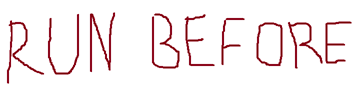

#Fill the grid

In [ ]:
# From a cash, read a list of words
def read_cash_from_file(file_path):
    cash = []
    with open(file_path, 'r') as file:
        for line in file:
            # Convert each line (comma-separated string) to a dictionary
            entry = eval(line.strip())
            cash.append(entry)
    return cash

# Example usage:
file_path = 'cash.txt'
word_list = read_cash_from_file(file_path)

In [ ]:
word_list = [{(16, 2, 7, 1): 'ПІНЕТКІ'}, {(12, 7, 7, 0): 'КРУМКАЧ'}, {(14, 5, 9, 1): 'ДВУХДОННЫ'}, {(10, 9, 6, 0): 'КАЛОДА'}, {(12, 7, 5, 1): 'КОЛЕР'}, {(12, 11, 7, 0): 'РУНЕЦЦА'}, {(18, 10, 9, 1): 'ПАГАРБЕЦЬ'}, {(10, 18, 9, 0): 'ПРАКРОІЦЬ'}, {(11, 12, 7, 1): 'ПЛАМБІР'}, {(7, 12, 5, 0): 'НАКІП'}, {(9, 10, 6, 1): 'ГІКАЦЬ'}, {(5, 14, 9, 0): 'НАПЭЦКАНЫ'}, {(7, 12, 7, 1): 'НАПАЛАМ'}, {(2, 16, 7, 0): 'ТАПЧЫЛА'}, {(4, 15, 4, 1): 'УПЭК'}, {(0, 18, 9, 0): 'ГЭТАКСАМА'}, {(0, 10, 9, 1): 'ЕГІПТОЛАГ'}, {(0, 14, 4, 0): 'ТРАЛ'}, {(2, 10, 7, 1): 'ВЕРМАХТ'}, {(0, 11, 7, 0): 'ГАЕРСКІ'}, {(4, 5, 9, 1): 'СЫЗРАНСКІ'}, {(3, 9, 6, 0): 'НАМЫЦЬ'}, {(6, 7, 5, 1): 'КРЫВІ'}, {(0, 7, 7, 0): 'БАНДЗЮК'}, {(0, 0, 9, 1): 'ВУЗКАЛОБЫ'}, {(0, 4, 4, 0): 'АПОЙ'}, {(2, 2, 7, 1): 'ПСОВІНА'}, {(2, 2, 7, 0): 'ПРАПЕТЫ'}, {(5, 4, 9, 0): 'САНТАНДЭР'}, {(11, 0, 7, 1): 'ПАВІДЛА'}, {(10, 2, 7, 0): 'АВАСКОП'}, {(14, 0, 4, 1): 'ЯРКІ'}, {(10, 0, 9, 0): 'СПРЫЯЛЬНА'}, {(18, 0, 9, 1): 'АДНАПЛЕЧЫ'}, {(15, 4, 4, 0): 'СНОП'}, {(7, 6, 5, 0): 'ЯХІДА'}, {(9, 3, 6, 1): 'ТАХІНА'}, {(7, 0, 7, 1): 'РАТАНІЯ'}, {(0, 0, 9, 0): 'ВЕРХАТУРА'}, {(4, 0, 4, 1): 'АБАЗ'}, {(10, 16, 7, 0): 'ЗБАЯЦЦА'}, {(16, 10, 7, 1): 'УЦЕКАЧА'}, {(15, 14, 4, 0): 'СААР'}]

In [ ]:
# Fill the grid using words from cash (given raw grid)
def fill_crossword(crossword_grid, word_list):
    for word_data in word_list:
        word_params = list(word_data.keys())[0]
        word = word_data[word_params]
        i, j, l, d = word_params
        grid = crossword_grid.copy()
        for k in range(l):
            if d == 1:  # Horizontal
                grid[i][j + k] = word[k]
            else:  # Vertical
                grid[i + k][j] = word[k]

    return grid

# Example usage:
filled_grid = fill_crossword(crossword_grid, word_list)

In [ ]:
# Visualize the filled crossword grid
import matplotlib.pyplot as plt
import numpy as np

def visualize_filled_crossword(filled_grid):
    # Convert the grid to a numpy array for visualization
    grid_array = np.array([[0 if cell == '#' else 1 for cell in row] for row in filled_grid])

    # Plotting the black-and-white grid with equal aspect ratio
    plt.imshow(grid_array, cmap='gray', interpolation='nearest', aspect='equal')

    # Add letters to white cells
    for i in range(len(filled_grid)):
        for j in range(len(filled_grid[i])):
            if filled_grid[i][j] != '#':
                plt.text(j, i, filled_grid[i][j], ha='center', va='center', color='black')

    plt.xticks(range(0, len(filled_grid[0])))
    plt.yticks(range(0, len(filled_grid)))

    ax = plt.gca()
    ax.xaxis.tick_top()

    # Show the grid
    plt.show()

# Assuming you've already filled the crossword grid using the fill_crossword function
visualize_filled_crossword(filled_grid)

#Other methods

In [ ]:
# If loop iterated over words with no increase over some time, step back in the cash and start from that value -> 1
  #temp#print('Check if iterating for too long')
  if iters_wo_rise >= threshold:

    return word_search(last_from_cash, cash, iters_no_rise, max_cash_size, longest_cash, global_cash)


#######################

# If the word starts with any of the stop letters, kill -> 2
  print('Checking if this letter is one of stop letters')
  if word_letter in ['ь','ы','ў'] and intersection == tuple(neighbor_params[:2]):

    return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

########################################

# If letter is not the same, clear the cash and try from the beginning -> 3
  else:
    print('The letters do NOT match, so clear the cash and restart the function with the previpus word from the cash')

      # Search for other words using updated parameters
      return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

##############################

# If such a word is NOT found -> 3
  else:
    print("NOT found any words with specified letters at intersections, so clear the cash and try again for the previous word")

    # Search for other words using updated parameters
    return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

########################################################

# If no new word is fulfilling the requirement -> 3
    else:
      print('NO word in database fulfills the requirements, so clear the cash till the current word and start searching from the previous')

      # Search for other words using updated parameters
      return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

In [ ]:
#MAIN
# Define a recursive function to search for words to fill in the crossword
import time
import datetime
start = time.time()
def word_search(parameters, cash, iters_wo_rise = 0, max_cash_size = 1, longest_cash = [], global_cash = []): # At first word and its parameters will be start_word generated previously
  print(f'---------------------{str(datetime.timedelta(seconds = round(time.time() - start, 0)))}---------------------')
  print(f'Current Cash: {cash}')
  print(f'Current Length of cash: {len(cash)}/{len(grid_words)}')
  print(f'Current at parameters: {parameters}')

  if len(cash) == len(global_cash):
    return cash

  # Define a final length of all the words
  params_len = len(all_parameters)

  # Sample start parameters from all parameters
  start_parameters = random.choice(all_parameters)

  # Extract the word and params of the previously cahsed word
  word, params = parameters

  # Extract intersections for the given parameters using params_intersections function
  intersections = params_intersections(params)
  # Print current word and params for debugging
  print(f"Current Intersections for the current parameters: {intersections}")

  # Current word in a format as in cash
  current_word = {params:word}

  # Find the index of the target word in a copy of cash
  index = cash.index(current_word)

  # Define a new coefficient for a stepback
  deviation = max_cash_size - len(cash) + 0.1 # 25x25 grid 4

  # Define a stepback in case a cash does not increase for a long while
  #stepback = int(round(iters_wo_rise*len(cash)*0.3)) # grid 5
  #stepback = int(round(iters_wo_rise)) # 25x25 grid 1
  #stepback = int(round(iters_wo_rise*len(cash)*0.05)) # 25x25 grid 2
  #stepback = int(round(deviation*iters_wo_rise*0.5)) # 25x25 grid 4
  #stepback = int(round(deviation*iters_wo_rise*2)) #ornament6
  #stepback = int(round((1/deviation)*len(cash)*0.5))
  stepback = int(round((deviation)*len(cash)*0.8))
  print(f'Deviation: {deviation}. Stepback: {stepback}')
  print(f'Current number of iterations without increase: {iters_wo_rise}')

  # Define a threshold to measure stagnation
  #threshold = int(round(len(cash)*0.6)) # grid 5
  #threshold = int(round(len(cash)*0.6)) # 25x25 grid
  if len(cash) < 10:
    threshold = 5
  elif len(cash) >= 10 and len(cash) < 20:
    threshold = 10
  elif len(cash) >= 20:
    threshold = 20

  # If loop iterated over words with no increase over some time, step back in the cash and start from that value
  #temp#print('Check if iterating for too long')
  if iters_wo_rise >= threshold:
    print(f'Number of interations without rise ({iters_wo_rise}) is greater or equals threshold {threshold}')
    #temp#print(f'Calculated stepback is {stepback}')
    print(f'Clear the cash up to the stepped back index: {index} - {stepback} = {index-stepback}')

    # Clear the right part of cash copy starting from index
    #clear_cash = cash[:index-stepback].copy() # Create an independent copy
    clear_cash = cash[:index-stepback].copy() #TEST

    # Clear the original cash
    #cash = clear_cash.copy()
    cash = clear_cash #TEST
    print(f'Cash after stepping back: {cash}')

    # If cash appears empty:
    #temp#print('Check if cash is empty')
    if not cash:
      print('Cash is empty, so reinitiate it with starting parameters')
      init_params = set_word(start_parameters)
      start_word, start_params = init_params
      cash.append({start_params:start_word})
      print(f'Restarted cash. Now cash is: {cash}')
    else:
      print('Cash is not empty')

    # Extract the last parameters from the cash
    last_from_cash = cash[-1]
    #temp#print(f'The last item from the cash: {last_from_cash}')

    # Convert dictionary to list
    dict_params, dict_word = next(iter(last_from_cash.items()))
    last_from_cash = [dict_word, dict_params]

    # Try finding other words using parameters of neighboring word
    print(f'Now start new loop with the last word from cash: {last_from_cash}')

    # Set counting parameters to initial values, as cash has already been stepped back
    iters_no_rise = 0
    max_cash_size = 1

    # Search for other words using updated parameters

    return word_search(last_from_cash, cash, iters_no_rise, max_cash_size, longest_cash, global_cash)
  else:
    print('Not iterating for too long, PROCEED')

  # If current cash is longer than the longest cash to date, set it as a new longest cash
  #temp#print('Checking if current cash is the longest')
  if len(cash) > len(longest_cash):
    print('Current cash is the longest')
    longest_cash = cash.copy()
  #temp#else:
  #temp#  print('Current cash is not the longest')

  print(f'The longest cash so far with length {len(longest_cash)}/{len(grid_words)}: {longest_cash}')
  # Iterate over the extracted list of intersections
  print('Starting iterating over list of intersections of current word')
  for intersection in intersections:
    print(f"Now at intersection {intersection} of word {parameters}")

    ####
    #word, params = parameters
    #current_word = {params:word}
    #cash = cash
    ####

    # Find neighboring parameters for this intersection
    neighbor_params = find_neighbors(params, intersection)
    print(f'Parameters of neighbor1 word having the same intersection current word: {neighbor_params}')

    # Find letters at intersection for a current word
    word_letter = letter_intersection(parameters, intersection)
    print(f"Current word and neighbor1 should intersect at letter: '{word_letter}'")

    # If the word starts with any of the stop letters, kill
    print('Checking if this letter is one of stop letters')
    if word_letter in ['ь','ы','ў'] and intersection == tuple(neighbor_params[:2]):
      print(f'A stop letter "{word_letter}" is at the begining of neighbor1')
      print('Clear the cash till the current word and start function with parameters of previous word:')

      # Clear the right part of cash copy starting from index
      #clear_cash = cash[:index].copy() # Create an independent copy
      clear_cash = cash[:index] #TEST

      # Clear the original cash
      #cash = clear_cash.copy()
      cash = clear_cash #TEST
      print(f'Cash after clearing current word: {cash}')

      # If cash appears empty:
      print('Check if cash is empty')
      if not cash:
        print('Cash is empty, so reinitiate it with starting parameters')
        init_params = set_word(start_parameters)
        start_word, start_params = init_params
        cash.append({start_params:start_word})
        print(f'Restarted cash. Now cash is: {cash}')
        # Set number if iteration without increase to -1 to give a chance to develop (1 will be added in further section)
        iters_wo_rise = -1
      else:
        print('Cash is not empty')

      # Extract the last parameters from the cash
      last_from_cash = cash[-1]
      print(f'The last item from the cash: {last_from_cash}')

      # Convert dictionary to list
      dict_params, dict_word = next(iter(last_from_cash.items()))
      last_from_cash = [dict_word, dict_params]

      # Try finding other words using parameters of neighboring word
      print(f'Now start new loop with the the previoius word {last_from_cash} to find a new current word')

      # Add 1 to the number of iterations without increase
      iters_wo_rise += 1

      # Search for other words using updated parameters
      return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

    # If the word does not start with any stop letters
    else:
      print('Neighbor1 does not start with any stop letters, PROCEED')

      print(f'Try to find a word in cash with the same parameters as neighbor1')
      # Find a word and corresponding parameters in cash using the same function
      cash_word_and_params = find_in_cash(cash, neighbor_params)

      # If any words in cash have the same parameters
      if cash_word_and_params:
        print(f'Found a word in cash with neighbor1 parameters: {cash_word_and_params}')

        # Find letters at this intersection for a word from the cash
        cash_letter = letter_intersection(cash_word_and_params, intersection)
        print(f'This word has letter "{cash_letter}" at {intersection}')

        # If the letter at intersection is the same between cash word and a previous word
        print('Checking if this letter is the same as for current word at this intersection')
        if cash_letter == word_letter:
          print(f'The letters match, so exit this loop (for {intersection}) and proceed to another intersection')
          continue # Exit this iteration thus ignoring adding new word to the cash. There is a match between a previous word and other previous word

        # If letter is not the same, clear the cash and try from the beginning
        else:
          print('The letters do NOT match, so clear the cash and restart the function with the previpus word from the cash')

          # Clear the right part of cash copy starting from index
          #if index >= 2:
          #  clear_cash = cash[:index-1].copy()  # Create an independent copy #TEST
          #else:
          #  clear_cash = []

          ###clear_cash = cash[:index-1] #TEST


          # Clear the original cash
          #cash = clear_cash.copy()
          ###cash = clear_cash #TEST
          #cash = cash.copy() ###TEST
          print(f'Word to remove is {current_word}')
          #HUJ
          if current_word in cash:
            cash.remove(current_word) ###TEST
            print(f'Cash after clearing current word: {cash}')

            # If cash appears empty:
            print('Check if cash is empty')
            if not cash:
              print('Cash is empty, so reinitiate it with starting parameters')
              init_params = set_word(start_parameters)
              start_word, start_params = init_params
              cash.append({start_params:start_word})
              print(f'Restarted cash. Now cash is: {cash}')
              # Set number if iteration without increase to -1 to give a chance to develop (1 will be added in further section)
              iters_wo_rise = -1
            else:
              print('Cash is not empty')

            # Extract the last parameters from the cash
            ###last_from_cash = cash[-1]
            last_from_cash = cash[index-1] ###TEST
            print(f'The last item from the cash: {last_from_cash}')

            # Convert dictionary to list
            dict_params, dict_word = next(iter(last_from_cash.items()))
            last_from_cash = [dict_word, dict_params]

            # Try finding other words using parameters of neighboring word
            print(f'Now start new loop with the the previoius word {last_from_cash} to find a new current word')

            # Add 1 to the number of iterations without increase
            iters_wo_rise += 1

            # Search for other words using updated parameters
            return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

      # If no words in cash have the same parameters
      else:
        print('NO word in cash has the neighbor1 parameters, PROCEED')

        print("Checking if neighbor's neighbors (neighbor2) are in cash")

        # Find parameters of neighbor's neighbors
        # Define a list to store parameters of nighbors2
        neighbor2_parameters = []
        # Iterate over intersections of neighbor1
        for neighbor_intersection in params_intersections(neighbor_params):
          # Find parameters of neighbor2
          neighbor2_params = find_neighbors(neighbor_params, neighbor_intersection)
          # Add found neighbor2 parameters to a previously defined list
          neighbor2_parameters.append(neighbor2_params)
        print(f'Found parameters of neighbors2: {neighbor2_parameters}')

        # Check if any of these neighbor's neighbors are in cash
        # Define a list to store words and parameters of neighbors2
        neighbor2_words = []
        # Iterate over found parameters to find words in cash
        for neighbor2 in neighbor2_parameters:
          # Find a word in cash with parameters from a list
          neighbor2_word = find_in_cash(cash, neighbor2)
          # Add a word to a list of words
          neighbor2_words.append(neighbor2_word)

        # Create a list to store letters at intersections with a neighbor's neighbor
        neighbor2_letters = []
        # Create a lsit to store intersections of neighbor with neighbor's neighbor
        common_intersections = []
        # Iterate over contents of the list of neighbor's neighbors words
        print('Checking if any neighbors2 with these parameters are in cash')
        for neighbors_neighbor in neighbor2_words:
          # If neighbor's neighbor word is not None
          if neighbors_neighbor:
            print(f'Found this word in cash having neighbor2 parameters: {neighbors_neighbor}')

            # Find a common intersection between a neighbor and a neighbor's neighbor
            neighbor1_interactions = params_intersections(neighbor_params) # List of all interactions for a neighbor
            neighbor2_interactions = params_intersections(neighbors_neighbor[1]) # List of all interactions for a neighbor's neighbor. neighbors_neighbor is ['word', (i,j,l,d)] so address the params at index 1
            common_intersection = list(set(neighbor1_interactions) & set(neighbor2_interactions))[0]

            # Append this intersection to a list of intersections
            common_intersections.append(common_intersection)

            # Find a letter at this intersection
            print(f'Neighbor1 and neighbor2 intersect at {common_intersection}. Checking the letter at this intersection')
            neighbor2_letter = letter_intersection(neighbors_neighbor, common_intersection)
            print(f"Neighbor2 has letter '{neighbor2_letter}' at this intersection, so neighbor1 should have the same letter")

            # Add a found letter to the list
            neighbor2_letters.append(neighbor2_letter)

          # If neighbor's neighbor is None, i.e. not found in cash - proceed with a standard routine, i.e. exit this loop
          else:
            continue

        # If list of letter is NOT empty, i.e. contains some
        if neighbor2_letters:
          print(f'Neighbors2 exist in cash, and have this letters at intersection with neighbor1: {neighbor2_letters}')

          #  Find a word that has letters at given intersections
          neighbor_word_letters = set_word_letters(neighbor_params, neighbor2_letters, common_intersections)

          # If such a word is found
          print('Checking if any word with these letters at intersections can be found')
          if neighbor_word_letters:
            #anothertest
            #ask = input(f'Word {neighbor_word_letters[0]} was found. Do u accept it? (1 - y, 2 - n, 3 - no, delete)')
            #if ask == 1:
            #  continue
            #elif ask == 2:
            #  #killer function
            #  pass
            #elif ask == 3:
            #  if neighbor_word_letters[0] in bel_words:
            #    bel_words.remove(neighbor_word_letters[0])
            #    #killer function

            print(f'A word {neighbor_word_letters} was found. Add it to the cash and use it as input parameters for the next loop, PROCEED')

            # Add the new word to the original cash
            new_word, new_params = neighbor_word_letters
            cash.append({new_params:new_word})
            print(f'New state of cash: {cash}')

            # Search for other words using updated parameters
            #return word_search(new_word_params, cash, counter) #test

            new_max_cash_size = max(max_cash_size, len(cash))

            #if len(cash) == 1:
            #  iters_wo_rise = 0
            #  max_cash_size = 1
            #else:

            # If the current cash size is the largest, reset the metrics. Otherwise do not punish because the code is trying!
            if new_max_cash_size <= max_cash_size:
              #iters_wo_rise += 1
              pass
            else:
              iters_wo_rise = 0
              max_cash_size = len(cash)

            # If the length of cash is the same as the length of all word slots, return the cash and end the function
            #if len(cash) == params_len:
            if len(cash) == params_len:
              print('Cash is full')
              print(cash)
              write_cash_to_file(cash, output_file_path)
              global_cash = cash.copy()
            else:
              print(f'Now start new loop with the new word and parameters')
              result = word_search(neighbor_word_letters, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)
              if result:
                # Extend the original cash with the result
                cash.extend(result)
              else:
                print('The end')

          # If such a word is NOT found
          else:
            print("NOT found any words with specified letters at intersections, so clear the cash and try again for the previous word")

            # Clear the right part of cash copy starting from index
            #if index >= 2:
            #  clear_cash = cash[:index-1].copy()  # Create an independent copy #TEST
            #else:
            #  clear_cash = []

            ###clear_cash = cash[:index-1] #TEST


            # Clear the original cash
            #cash = clear_cash.copy()
            ###cash = clear_cash #TEST
            #cash = cash.copy() ###TEST
            cash.remove(current_word) ###TEST
            print(f'Cash after clearing current word: {cash}')

            # If cash appears empty:
            print('Check if cash is empty')
            if not cash:
              print('Cash is empty, so reinitiate it with starting parameters')
              init_params = set_word(start_parameters)
              start_word, start_params = init_params
              cash.append({start_params:start_word})
              print(f'Restarted cash. Now cash is: {cash}')
              # Set number if iteration without increase to -1 to give a chance to develop (1 will be added in further section)
              iters_wo_rise = -1
            else:
              print('Cash is not empty')

            # Extract the last parameters from the cash
            ###last_from_cash = cash[-1]
            last_from_cash = cash[index-1] ###TEST
            print(f'The last item from the cash: {last_from_cash}')

            # Convert dictionary to list
            dict_params, dict_word = next(iter(last_from_cash.items()))
            last_from_cash = [dict_word, dict_params]

            # Try finding other words using parameters of neighboring word
            print(f'Now start new loop with the the previoius word {last_from_cash} to find a new current word')

            # Add 1 to the number of iterations without increase
            iters_wo_rise += 1

            # Search for other words using updated parameters
            return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

        # If list of letters is empty
        else:
          print("There are NO neighbors2 in cash, so PROCEED")
          # prooceed with a standard routine

          # Try to find a new word with the letter from previous word at this intersection
          new_word_params = set_word_letter(neighbor_params, word_letter, intersection)
          print(f'Trying to find a neighbor1 word in database with parameters {neighbor_params} and letter "{word_letter}" at intersection {intersection}')

          # If any word fulfilling requirements is found
          if new_word_params:
            #anothertest
            #ask = input(f'Word {new_word_params[0]} was found. Do u accept it? (1 - y, 2 - n, 3 - no, delete)')
            #if ask == 1:
            #  continue
            #elif ask == 2:
            #  #killer function
            #  pass
            #elif ask == 3:
            #  if new_word_params[0] in bel_words:
            #    bel_words.remove(new_word_params[0])
            #    #killer function

            print(f'A word {new_word_params} was found. Add it to the cash and use it as input parameters for the next loop')

            # Add the new word to the original cash
            new_word, new_params = new_word_params
            cash.append({new_params:new_word})
            print(f'New state of cash: {cash}')

            # Search for other words using updated parameters
            #return word_search(new_word_params, cash, counter) #test

            new_max_cash_size = max(max_cash_size, len(cash))

            #if len(cash) == 1:
            #  iters_wo_rise = 0
            #  max_cash_size = 1
            #else:

            # If the current cash size is the largest, reset the metrics. Otherwise do not punish because the code is trying!
            if new_max_cash_size <= max_cash_size:
              #iters_wo_rise += 1
              pass
            else:
              iters_wo_rise = 0
              max_cash_size = len(cash)

            # If the length of cash is the same as the length of all word slots, return the cash and end the function
            #if len(cash) == params_len:
            if len(cash) == params_len:
              print('Cash is full')
              print(cash)
              write_cash_to_file(cash, output_file_path)
              global_cash = cash.copy()
            else:
              print(f'Now start new loop with the new word and parameters')
              result = word_search(new_word_params, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)
              if result:
                # Extend the original cash with the result
                cash.extend(result)
              else:
                print('The end')

          # If no new word is fulfilling the requirement
          else:
            print('NO word in database fulfills the requirements, so clear the cash till the current word and start searching from the previous')

            # Clear the right part of cash copy starting from index
            #if index >= 2:
            #  clear_cash = cash[:index-1].copy()  # Create an independent copy #TEST
            #else:
            #  clear_cash = []

            ###clear_cash = cash[:index-1] #TEST

            # Clear the original cash
            #cash = clear_cash.copy()
            ###cash = clear_cash #TEST
            #cash = cash.copy() ###TEST
            cash.remove(current_word) ###TEST
            print(f'Cash after clearing current word: {cash}')

            # If cash appears empty:
            print('Check if cash is empty')
            if not cash:
              print('Cash is empty, so reinitiate it with starting parameters')
              init_params = set_word(start_parameters)
              start_word, start_params = init_params
              cash.append({start_params:start_word})
              print(f'Restarted cash. Now cash is: {cash}')
              # Set number if iteration without increase to -1 to give a chance to develop (1 will be added in further section)
              iters_wo_rise = -1
            else:
              print('Cash is not empty')

            # Extract the last parameters from the cash
            ###last_from_cash = cash[-1]
            last_from_cash = cash[index-1] ###TEST
            print(f'The last item from the cash: {last_from_cash}')

            # Convert dictionary to list
            dict_params, dict_word = next(iter(last_from_cash.items()))
            last_from_cash = [dict_word, dict_params]

            # Try finding other words using parameters of neighboring word
            print(f'Now start new loop with the the previoius word {last_from_cash} to find a new current word')

            # Add 1 to the number of iterations without increase
            iters_wo_rise += 1

            # Search for other words using updated parameters
            return word_search(last_from_cash, cash, iters_wo_rise, max_cash_size, longest_cash, global_cash)

##Reinitialize the crossword grid

In [ ]:
import pandas as pd
grid_df = pd.read_csv('grid', header = None)
crossword_grid = grid_df.values.tolist()

##Save a list of words in cash cash

In [ ]:
cash_incomplete =
write_cash_to_file(cash_incomplete, 'cash.txt')

##Manually find the words given incompleted cash

In [ ]:
# Define parameters list (list of tuples)
all_parameters = grid_words

# Make a cash to store words with corresponding parameters
words_cash = word_list

# Add start word to the cash
init_params = ['', (, , , )]

print(word_search(init_params, words_cash))

##Manually find words given their parameters and letters at intersections

In [ ]:
print(set_word_letters_all((, , , ), [''], [(, )]))

##Export the filled grid

In [ ]:
filled_grid = pd.DataFrame(filled_grid)
filled_grid.to_csv("filled_grid.csv", encoding = 'utf-8-sig', index=False, header=False)

##Draw a crossword using saved cash (without raw grid)

In [ ]:
def fill_crossword(word_list):
    # Determine grid size based on word positions
    max_row = max([list(word.keys())[0][0] + (list(word.keys())[0][2] if list(word.keys())[0][3] == 0 else 0) for word in word_list]) -1
    max_col = max([list(word.keys())[0][1] + (list(word.keys())[0][2] if list(word.keys())[0][3] == 1 else 0) for word in word_list]) -1

    # Initialize empty grid
    grid = [['#' for _ in range(max_col + 1)] for _ in range(max_row + 1)]

    # Fill the grid with words
    for word_data in word_list:
        word_params = list(word_data.keys())[0]
        word = word_data[word_params]
        i, j, l, d = word_params
        for k in range(l):
            if d == 1:  # Horizontal
                grid[i][j + k] = word[k]
            else:  # Vertical
                grid[i + k][j] = word[k]

    return grid

# Example usage:
file_path = 'cash.txt'
word_list = read_cash_from_file(file_path)
filled_grid = fill_crossword(word_list)
visualize_filled_crossword(filled_grid)

##From a cash, extract the raw crossword grid

In [ ]:
def extract_crossword_grid(filled_grid):
    # Initialize an empty list to store the extracted crossword grid
    crossword_grid = []

    # Iterate over each row in the filled grid
    for row in filled_grid:
        # Initialize an empty list to store the extracted row
        extracted_row = []
        # Iterate over each cell in the row
        for cell in row:
            # If the cell contains a letter, replace it with "_", otherwise leave it unchanged
            extracted_cell = "_" if cell.isalpha() else cell
            # Append the extracted cell to the row
            extracted_row.append(extracted_cell)
        # Append the extracted row to the crossword grid
        crossword_grid.append(extracted_row)

    return crossword_grid

# Example usage:
extracted_grid = extract_crossword_grid(filled_grid)

In [ ]:
# Visualize the extracted grid
import matplotlib.pyplot as plt
import numpy as np

# Convert the grid to a numpy array for visualization
grid_array = np.array([[1 if cell == '_' else 0 for cell in row] for row in extracted_grid])

# Plotting the black-and-white grid
plt.imshow(grid_array, cmap='gray', interpolation='nearest')
plt.xticks(range(0, grid_array[0].shape[0]))
plt.yticks(range(0, grid_array[1].shape[0]))
ax = plt.gca()
ax.xaxis.tick_top()

# Show the grid
plt.show()

In [ ]:
crossword_grid = extracted_grid

##Expand the list of words to filter out

In [ ]:
filter_out.extend([''])